 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [54]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [55]:
# Reading whale returns set path, read path, set datetime and set index as the date
whale_path = Path("whale_returns.csv")
whale_df = pd.read_csv(whale_path, parse_dates=True, infer_datetime_format=True)
whale_df["Date"] = pd.to_datetime(whale_df["Date"])
whale_df.set_index("Date", inplace=True)
whale_df.sort_index(inplace=True)
whale_df.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801


In [56]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [57]:
# Drop nulls and check again for nulls
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [58]:
# Reading algorithmic returns set path, read path, set datetime and set index as the date
algo_path = Path("algo_returns.csv")
algo_df = pd.read_csv(algo_path, parse_dates=True, infer_datetime_format=True)
algo_df["Date"] = pd.to_datetime(algo_df["Date"])
algo_df.set_index("Date", inplace=True)
algo_df.sort_index(inplace=True)
algo_df.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [59]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [60]:
# Drop nulls and recheck
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [61]:
# Reading S&P 500 Closing Prices set path, read path, set datetime and set index as the date
sp500_path = Path("sp500_history.csv")
sp500_df = pd.read_csv(sp500_path, parse_dates=True, infer_datetime_format=True)
sp500_df["Date"] = pd.to_datetime(sp500_df["Date"])
sp500_df.set_index("Date", inplace=True)
sp500_df.sort_index(inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [62]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [63]:
# Fix Data Types --> change from object to integer
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")
sp500_df["Close"] = sp500_df["Close"].astype("float")
sp500_df.head()
#sp500_df.dtypes

/Users/mikewenner/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [64]:
# Calculate Daily Returns
sp500_daily_returns = sp500_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [65]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [66]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.rename(columns={"Close": "sp500"}, inplace=True)
sp500_daily_returns.head()

,sp500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [67]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame 
# with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, sp500_daily_returns], axis="columns", join="inner")
combined_df.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.001918
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.012601
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.006075


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of Funds Mar 2015 - April 2019'}, xlabel='Date'>

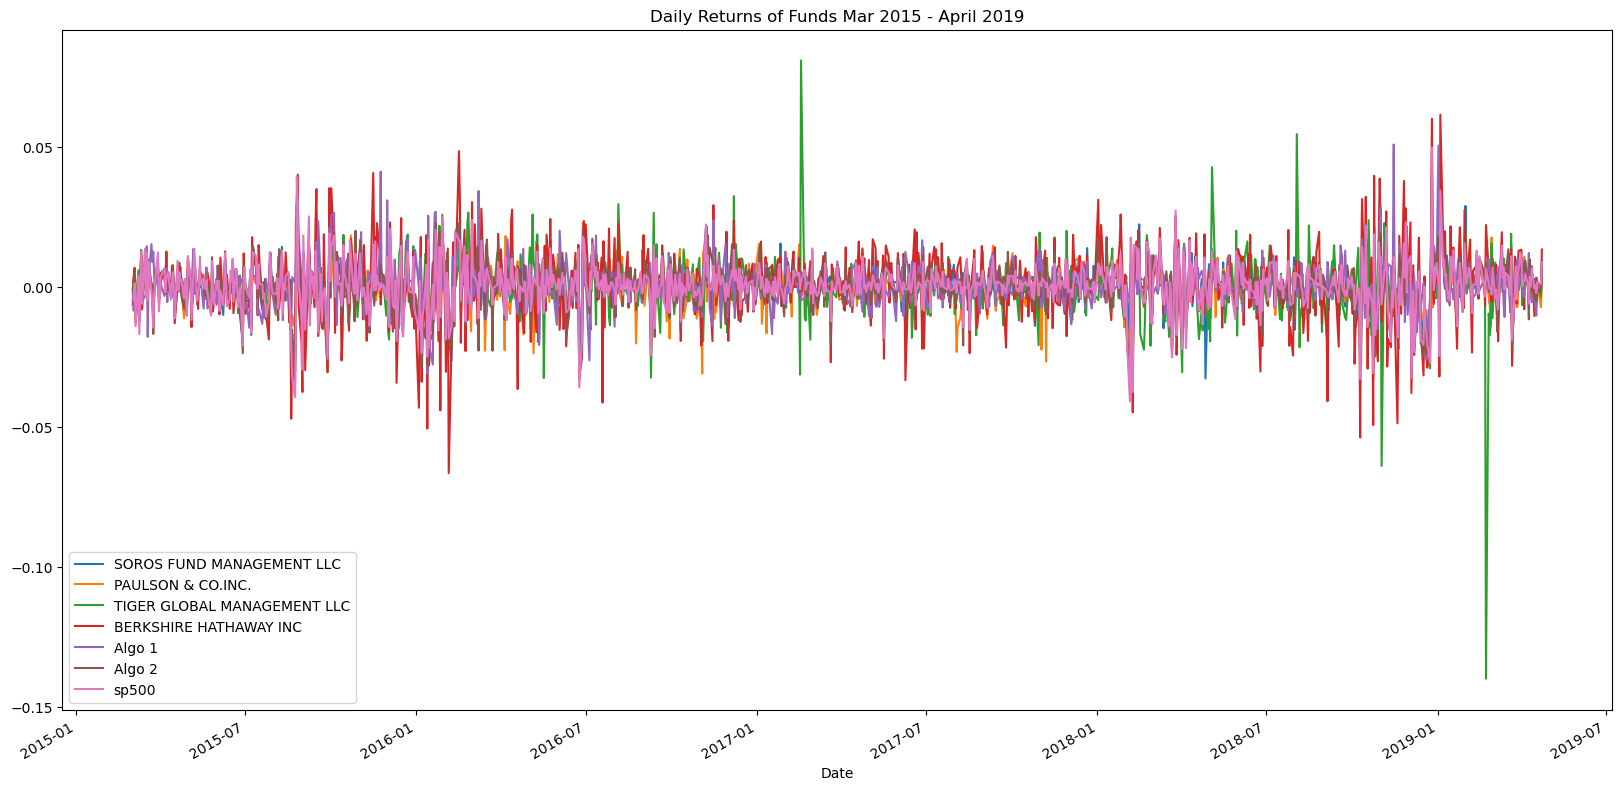

In [68]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20, 10), legend=True, title="Daily Returns of Funds Mar 2015 - April 2019")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns by Fund Mar 2015 - April 2019'}, xlabel='Date'>

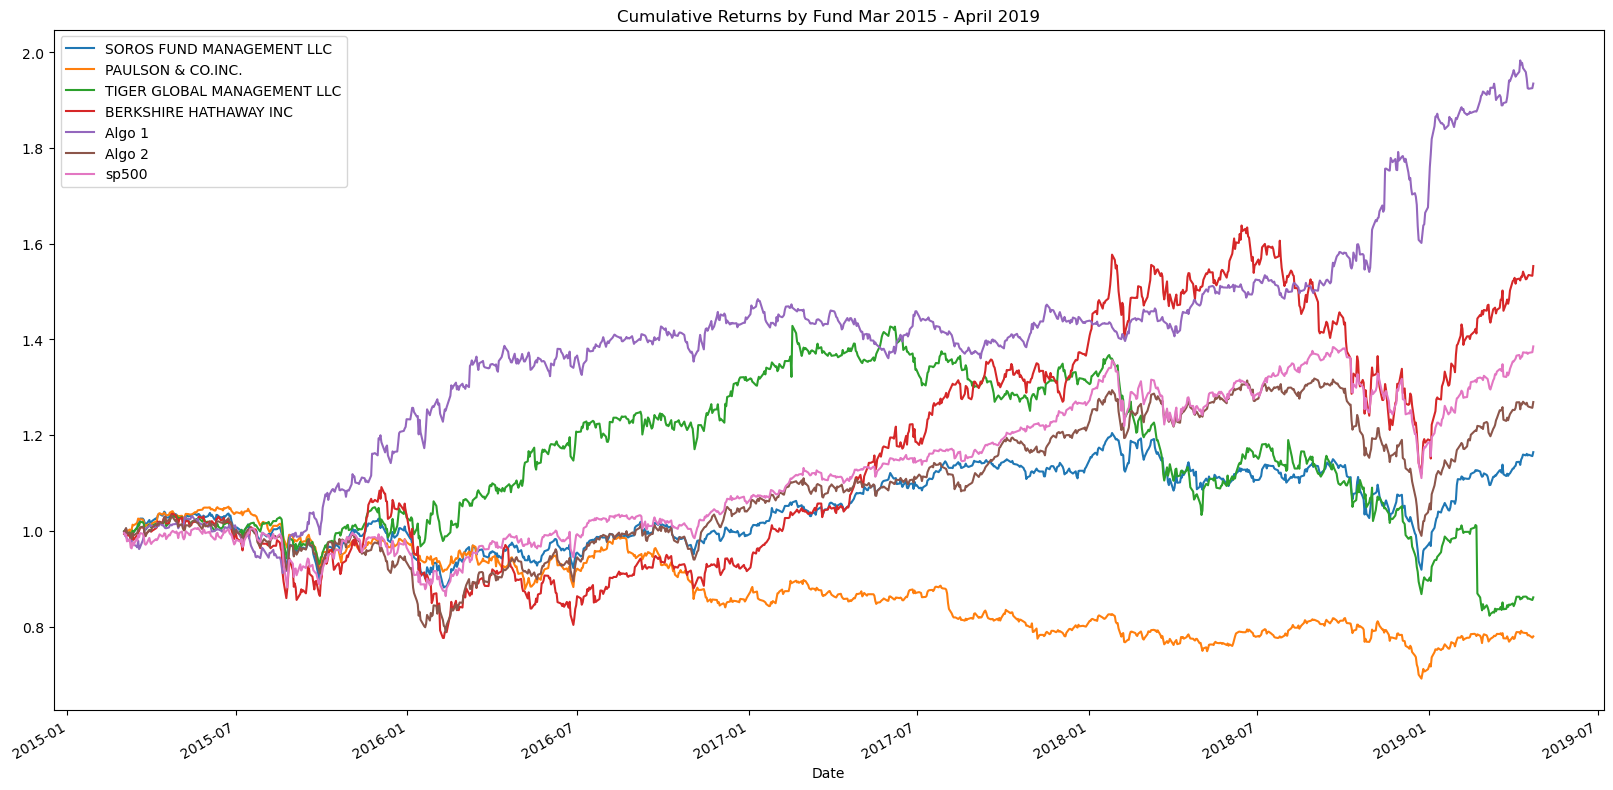

In [69]:
# Calculate cumulative returns of all portfolios --cumprod
cum_return = (1 + combined_df).cumprod()
# Plot cumulative returns
cum_return.plot(figsize=(20, 10), legend=True, title="Cumulative Returns by Fund Mar 2015 - April 2019")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Risk Analysis by Portfolio'}>

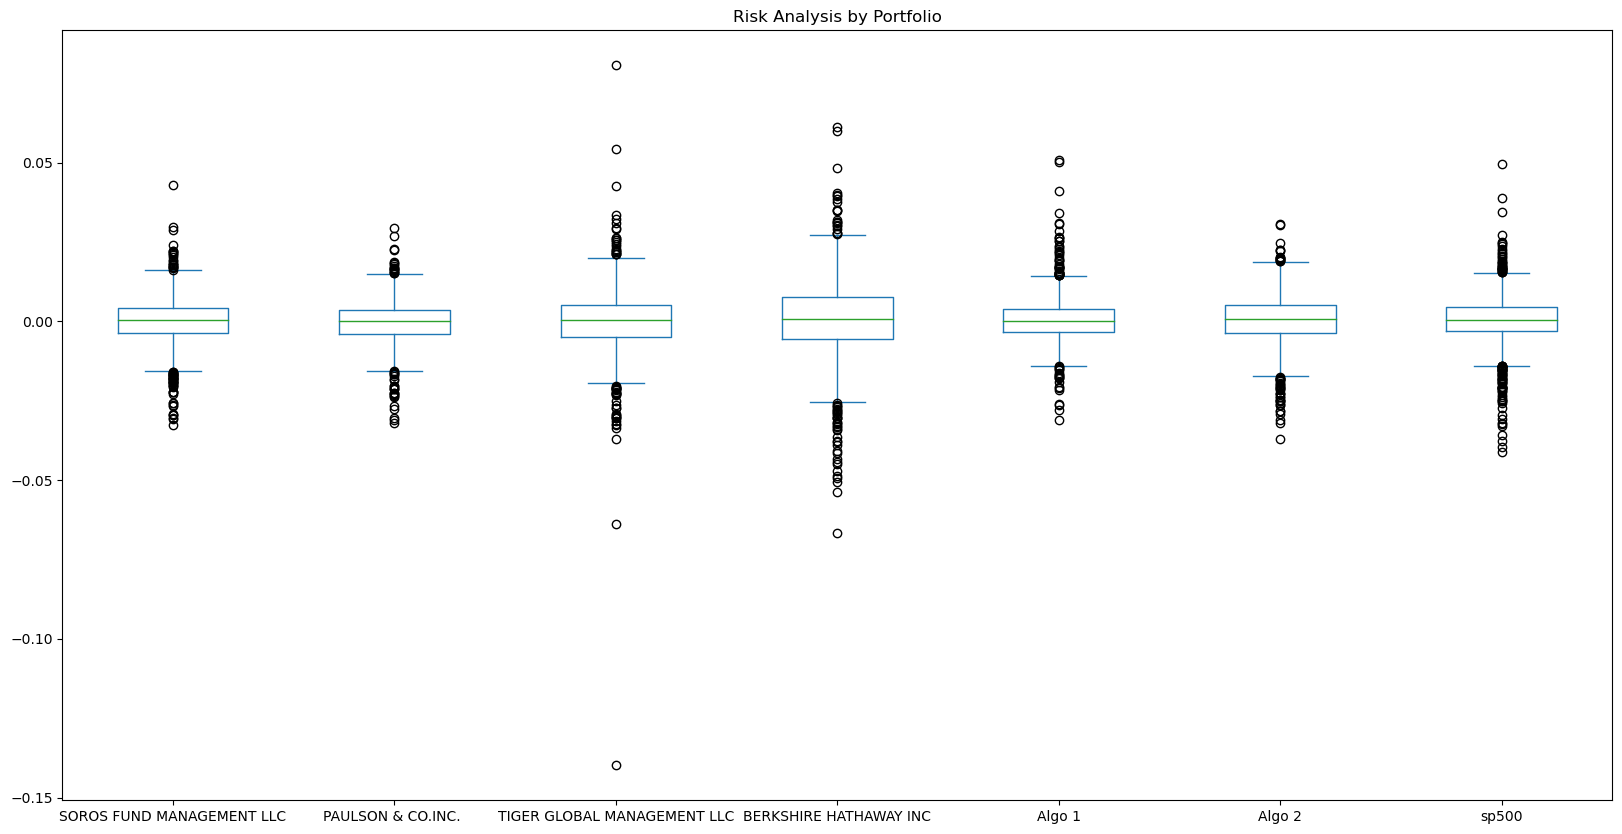

In [70]:
# Box plot to visually show risk
combined_df.plot(kind="box", figsize=(20, 10), title="Risk Analysis by Portfolio")

### Calculate Standard Deviations

In [71]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_df.std()
daily_std.sort_values(inplace=True)
daily_std.head(10)

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
sp500                          0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

<AxesSubplot:title={'center':'Daily Standard Devation by Portfolio'}>

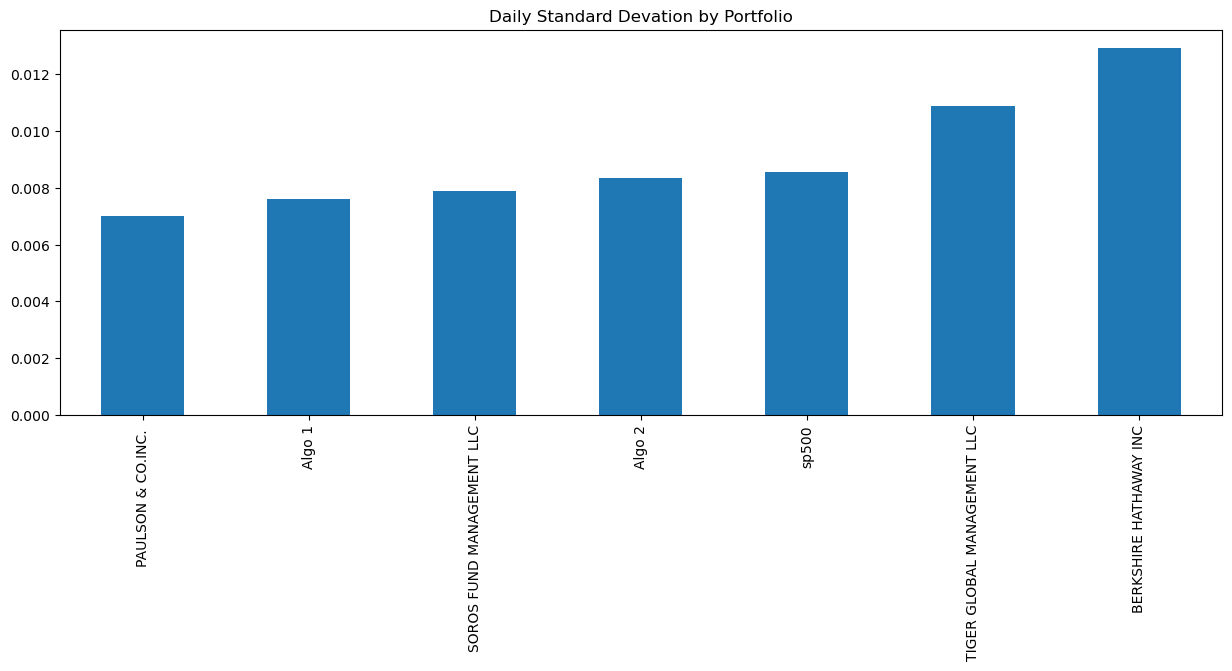

In [72]:
# Calculate  the daily standard deviation of S&P 500
# ***this can be seen in the above list, daily stdev of sp500 = 0.008554****

# Determine which portfolios are riskier than the S&P 500
daily_std.plot(kind="bar", figsize=(15,5), title="Daily Standard Devation by Portfolio")

#So by looking at the bar chart below, the portfolios that are riskier than the S&P500 are:
# Tiger Global Management LLC & Berkshire Hathaway INC

### Calculate the Annualized Standard Deviation

In [73]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = daily_std * np.sqrt(252)
annual_std.sort_values(inplace=True)
annual_std.head(10)

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
sp500                          0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

<AxesSubplot:title={'center':'Annualized Standard Deviation by Portfolio'}>

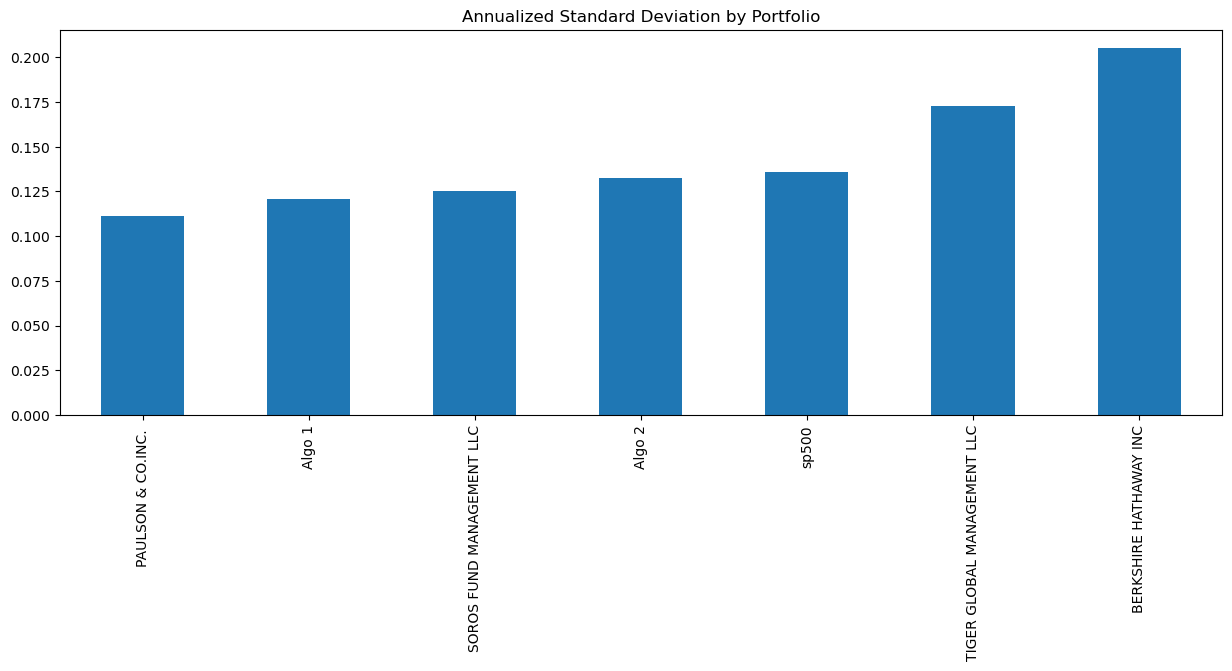

In [74]:
# looking at the annualized std graphically:
annual_std.plot(kind = "bar", figsize=(15, 5), title="Annualized Standard Deviation by Portfolio")

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21day Standard Deviation by Fund Mar2015 - Apr2019'}, xlabel='Date'>

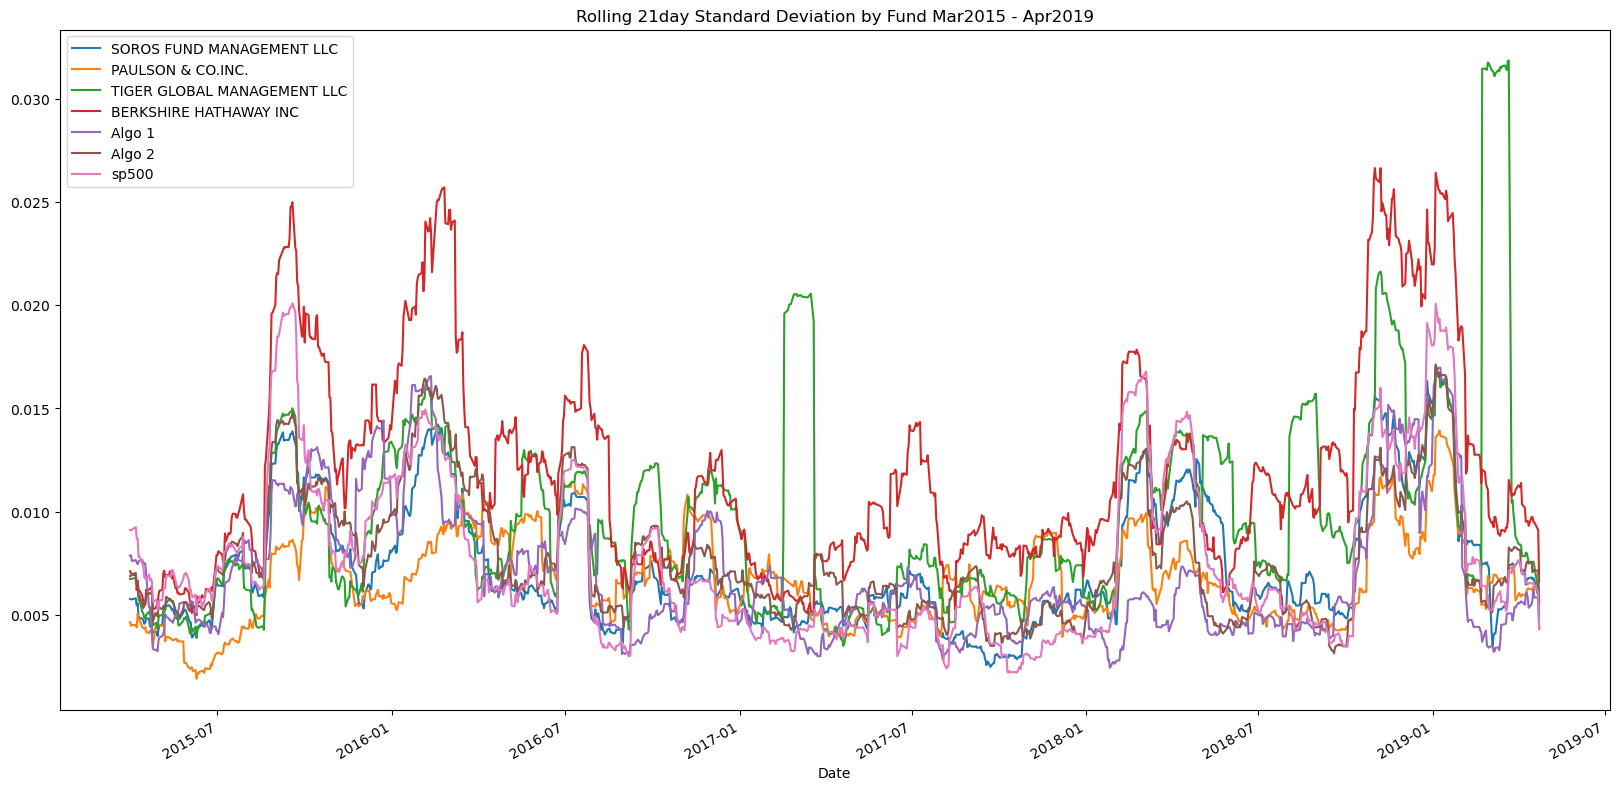

In [75]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
combined_df.rolling(window=21).std().plot(figsize=(20,10), title="Rolling 21day Standard Deviation by Fund Mar2015 - Apr2019")

### Calculate and plot the correlation

In [76]:
# Calculate the correlation
correlation = combined_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
sp500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:>

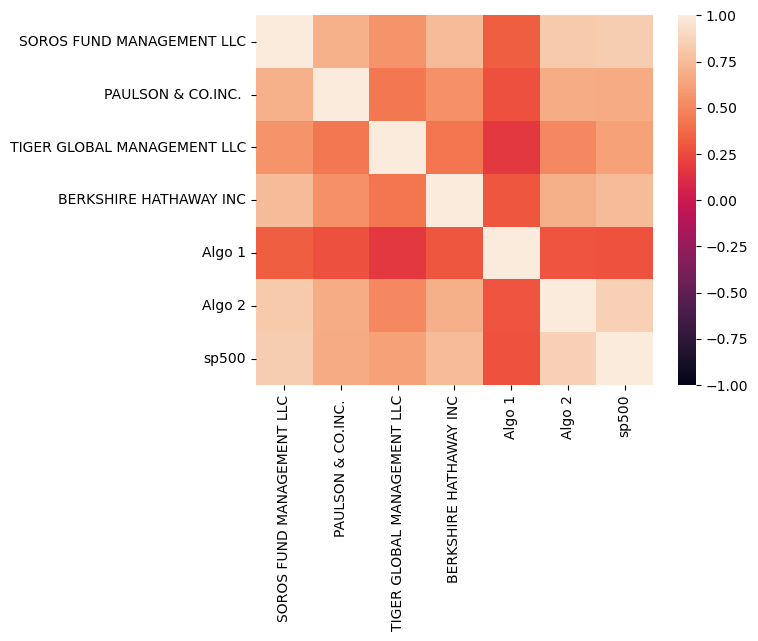

In [79]:
# Display the correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [80]:
# Calculate covariance of a single portfolio --> here I will look at algo1 portfolio and the S&P500
covariance = combined_df["Algo 1"].cov(combined_df["sp500"])
covariance

1.821774999163274e-05

In [81]:
# Calculate variance of S&P 500
variance = combined_df["sp500"].var()
variance

7.316632424648712e-05

In [82]:
# Computing beta of algo 1 portfolio
algo1_beta = covariance/variance
algo1_beta

0.24899091459425635

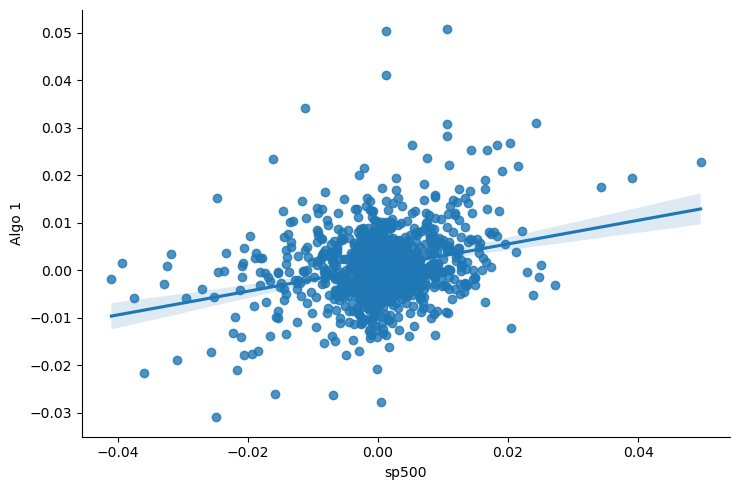

In [83]:
# Plot beta trend
sns.lmplot(x="sp500", y="Algo 1", data=combined_df, aspect=1.5, fit_reg=True)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [88]:
# Use `ewm` to calculate the rolling window
# combined_df.ewm(halflife="21 days", times="T").std()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [91]:
# Annualized Sharpe Ratios --> here I assume a RFR of 0
sharpe_ratios = (combined_df.mean()*252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios.sort_values(inplace=True)
sharpe_ratios

PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
sp500                          0.648267
Algo 1                         1.378648
dtype: float64

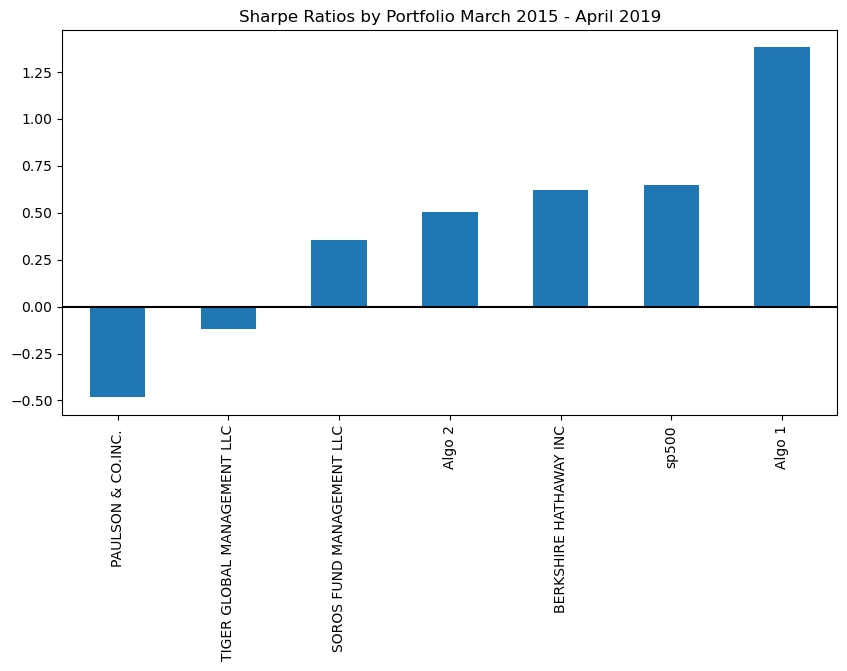

In [95]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", figsize=(10, 5), title="Sharpe Ratios by Portfolio March 2015 - April 2019")
import matplotlib.pyplot as plt
plt.axhline(y=0, color="black", linestyle="-")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

We will look to answer this question by looking at two metrics, the total return (cumulative returns) and the risk adjusted returns or Sharpe ratios. 

First by examining the total return or cumulative return plot, we can obtain an idea of how each of the portfolios performed over time. At the end of the period between March 2015 - April 2019, on April 23, 2019, the highest absolute cum return was for Algo1 portfolio at 1.93.  This was followed by: Berkshire, S&P, Algo2, Soros, Tiger and then Paulson respectively, refer to table below for cum return values on 4/23/19.  Next, we want to look at the total final cum return of the strategies combined broken into three categories.  First the algo category will combine the algo1 and algo2 strategies. Second, the whale category will combine Soros, Paulson, Tiger and Berkshire returns and finally the S&P will stand alone as its own category. For each we will look at an average final cum return from the table below on 4/23/19.  In doing this we find:

Algo Strategies - 1.60 (avg of algo1 & 2 from below)
Whale Strategies - 1.09 (avg of Soros, Paulson, Tiger and Berkshire from below)
S&P500 - 1.38 (taken directly from table below)

This leads us to conclude from a total cumulative return perspective that the algorithmic strategies gave the greatest total cum return followed by the S&P500 then the whale strategies.

The second analysis we want to examine is the risk untertaken to achieve these retults.  This will be performed by examining the Sharpe ratios of each portfolio as well as the average Sharpe ratio of the combined portfolios in a similar process to the previous analysis for total cum return.  In looking at individual Sharpe ratios we find a similar story in that Algo1 has the highest value followed by S&P, Berkshire, Algo2, Soros, Tiger and then Paulson respectively. Interesting info that we can see here is that although Berkshire had the higher final return vs S&P500, its sharpe ratio fell below that of the S&P500, meaning it took on more risk to achieve that slightly higer return. Finally, if we look at the average Sharpe ratios for the buckets of strategies we find the following:

Algo Strategies - 0.939
Whale Strategies - 0.09
S&P500 - 0.648

In combining the analysis of the Sharpe ratios and the final total cum return we can conclude that the algorithmic strategies outperform both the S&P500 as well as the whale strategies both from a total return perspective as well as from a risk adjusted return perspective.

In [112]:
#Pull the last set of entries for the cum return to look at final values
cum_return.tail()
cum_return.iloc[-1] 

SOROS FUND MANAGEMENT LLC      1.164568
PAULSON & CO.INC.              0.779646
TIGER GLOBAL MANAGEMENT LLC    0.861189
BERKSHIRE HATHAWAY INC         1.553401
Algo 1                         1.934691
Algo 2                         1.269247
sp500                          1.385517
Name: 2019-04-23 00:00:00, dtype: float64

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [114]:
# Reading data from 1st stock -- aapl --set path, rread csv with pandas, set datetime format, set dat to index, sor the index
aapl_path = Path("aapl_historical.csv")
aapl_df = pd.read_csv(aapl_path, parse_dates=True, infer_datetime_format=True)
aapl_df["Trade DATE"] = pd.to_datetime(aapl_df["Trade DATE"])
aapl_df.set_index("Trade DATE", inplace=True)
aapl_df.sort_index(inplace=True)
aapl_df.head(10)


,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99
2018-05-18,AAPL,186.31
2018-05-21,AAPL,187.63
2018-05-22,AAPL,187.16
2018-05-23,AAPL,188.36


In [116]:
# Reading data from 2nd stock - cost
cost_path = Path("cost_historical.csv")
cost_df = pd.read_csv(cost_path, parse_dates=True, infer_datetime_format=True)
cost_df["Trade DATE"] = pd.to_datetime(cost_df["Trade DATE"])
cost_df.set_index("Trade DATE", inplace=True)
cost_df.sort_index(inplace=True)
cost_df.head(10)

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60
2018-05-18,COST,198.96
2018-05-21,COST,199.62
2018-05-22,COST,198.97
2018-05-23,COST,198.14


In [117]:
# Reading data from 3rd stock - goog
goog_path = Path("goog_historical.csv")
goog_df = pd.read_csv(goog_path, parse_dates=True, infer_datetime_format=True)
goog_df["Trade DATE"] = pd.to_datetime(goog_df["Trade DATE"])
goog_df.set_index("Trade DATE", inplace=True)
goog_df.sort_index(inplace=True)
goog_df.head(10)

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59
2018-05-18,GOOG,1066.36
2018-05-21,GOOG,1079.58
2018-05-22,GOOG,1069.73
2018-05-23,GOOG,1079.69


In [132]:
# Combine all stocks in a single DataFrame - concat by col
combine_col_df = pd.concat([aapl_df, cost_df, goog_df], axis="columns", join="inner")
combine_col_df.tail()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-03,AAPL,211.75,COST,244.62,GOOG,1185.40
2019-05-06,AAPL,208.48,COST,244.23,GOOG,1189.39
2019-05-07,AAPL,202.86,COST,240.18,GOOG,1174.10
2019-05-08,AAPL,202.90,COST,241.34,GOOG,1166.27
2019-05-09,AAPL,200.72,COST,243.47,GOOG,1162.38


In [133]:
# Reset Date index --??

In [134]:
# Reorganize portfolio data by having a column per symbol
# first rename the NOCP columns by stock
columns=["symbolaapl", "AAPL", "symbolcost", "COST", "symbolgoog", "GOOG"]
combine_col_df.columns = columns
combine_col_df.head()

#delete the symbol columns
# combine_col_df.drop(columns=["symbolaapl", "symbolcost", "symbolgoog"], inplace=True)
# combine_col_df.head

,symbolaapl,AAPL,symbolcost,COST,symbolgoog,GOOG
Trade DATE,,,,,,
2018-05-11,AAPL,188.59,COST,195.76,GOOG,1098.26
2018-05-14,AAPL,188.15,COST,195.88,GOOG,1100.20
2018-05-15,AAPL,186.44,COST,195.48,GOOG,1079.23
2018-05-16,AAPL,188.18,COST,198.71,GOOG,1081.77
2018-05-17,AAPL,186.99,COST,199.60,GOOG,1078.59


In [135]:
#delete the symbol columns
combine_col_df.drop(columns=["symbolaapl", "symbolcost", "symbolgoog"], inplace=True)
combine_col_df.head()

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [137]:
# Calculate daily returns
combined_daily_returns = combine_col_df.pct_change()
combined_daily_returns.head()


,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940


In [138]:
# Drop NAs
combined_daily_returns.dropna(inplace=True)
combined_daily_returns.head()
# Display sample data


,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


In [144]:
combined_daily_returns.dtypes

AAPL    float64
COST    float64
GOOG    float64
dtype: object

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [160]:
# Set weights
#weights = [1/3, 1/3, 1/3]
aapl_weight = 0.3
cost_weight = 0.3
goog_weight = 0.3

# Calculate portfolio return
# Display sample data
my_portfolio_returns = (aapl_weight * combined_daily_returns["AAPL"]) + (cost_weight * combined_daily_returns["COST"]) 
+ (goog_weight * combined_daily_returns["GOOG"])
my_portfolio_returns.head()

Trade DATE
2018-05-14   -0.000516
2018-05-15   -0.003339
2018-05-16    0.007757
2018-05-17   -0.000553
2018-05-18   -0.002053
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [161]:
# Join your returns DataFrame to the original returns DataFrame
combined_final_df = pd.concat([combined_df, my_portfolio_returns], axis="columns", join="inner")
combined_final_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500,0
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,-0.000516
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.003339
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.007757
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.000553
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.002053


In [164]:
combined_final_df.rename(columns={"0" : "My Portfolio"}, inplace=True)
combined_final_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500,0
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,-0.000516
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.003339
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.007757
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.000553
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.002053


In [165]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_final_df.dropna(inplace=True)
combined_final_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
sp500                          0
0                              0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [166]:
# Calculate the annualized `std`daily stds first
final_daily_std = combined_final_df.std()
# annualized stdev
final_annualized_std = final_daily_std * np.sqrt(252)
final_annualized_std

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
sp500                          0.152054
0                              0.130001
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 21day Standard Deviation All Portfolios March 2015 - April 2019'}>

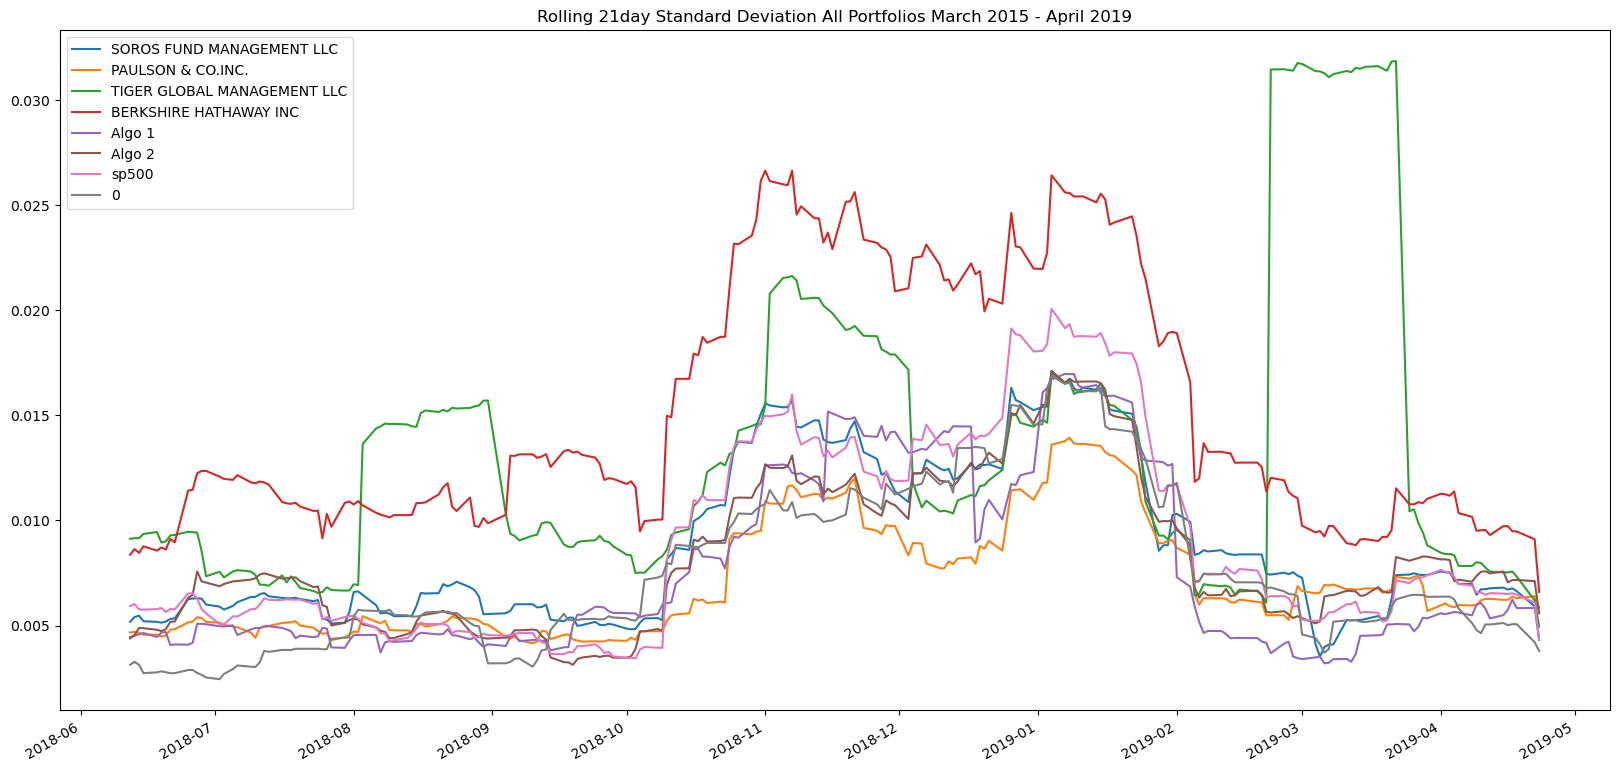

In [167]:
# Calculate rolling standard deviation

# Plot rolling standard deviation
combined_final_df.rolling(window=21).std().plot(figsize=(20,10), title="Rolling 21day Standard Deviation All Portfolios March 2015 - April 2019")

### Calculate and plot the correlation

<AxesSubplot:>

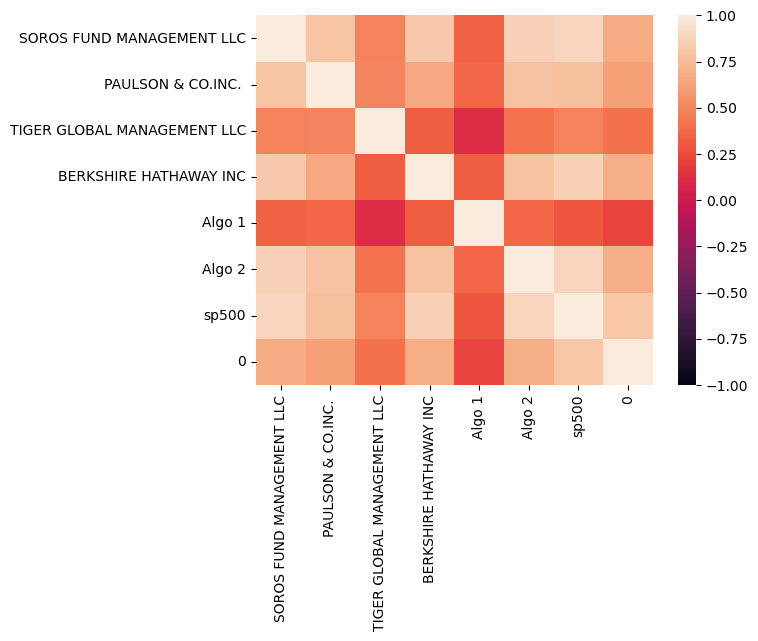

In [168]:
# Calculate and plot the correlation
correlation_all = combined_final_df.corr()
sns.heatmap(correlation_all, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!